In [382]:
import numpy as np
import pandas as pd


## 1. Data Cleaning


In [383]:
df = pd.read_csv("data/spam.csv", encoding="latin-1")


In [384]:
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [385]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


The reason for dropping these columns is that they are unnamed and likely not useful for analysis or modeling purposes. By dropping them, we can simplify the DataFrame and reduce the memory usage. Given the amount of non-null values had been significant in our dataframe, I may have thought of keeping them or doing some research about it. Although, given the number of values that we currently have, I can confidently drop them since they may add little to no value in our analysis.


In [386]:
# drop the last 3 columns using iloc
df = df.iloc[:, :-3]


In [387]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [388]:
df.shape


(5572, 2)

In [389]:
df.sample(5)


,v1,v2
4649,ham,Finally it has happened..! Aftr decades..! BEE...
712,spam,08714712388 between 10am-7pm Cost 10p
2689,ham,"Ya ok, vikky vl c witin &lt;#&gt; mins and il..."
3742,ham,"Nah, Wednesday. When should I bring the mini c..."
863,ham,Did u find out what time the bus is at coz i n...


In [390]:
# Rename the 'v1' column to 'target' and 'v2' column to 'text'
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

# Print a random sample of 5 rows to confirm the column renaming
df.sample(5)


,target,text
1012,ham,I dunno they close oredi not... ÌÏ v ma fan...
3780,ham,"Dear friends, sorry for the late information. ..."
1247,ham,Horrible gal. Me in sch doing some stuff. How ...
4614,spam,Sunshine Quiz! Win a super Sony DVD recorder i...
4945,ham,I'm already back home so no probably not


In [391]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [392]:
df['target'] = encoder.fit_transform(df['target'])


In [393]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [394]:
# Count the number of missing values in each column
missing_values = df.isnull().sum()

# Print the results
print("Number of missing values:\n", missing_values)


Number of missing values:
 target    0
text      0
dtype: int64


In [395]:
# Count the number of duplicate rows
num_duplicates = df.duplicated().sum()

# Print the result
print("Number of duplicate rows:", num_duplicates)


Number of duplicate rows: 403


In [396]:
# Remove duplicate rows, keeping the first occurrence
df = df.drop_duplicates(keep='first')

# Print the shape of the DataFrame to confirm the removal of duplicate rows
print("Shape of the DataFrame after removing duplicates:", df.shape)


Shape of the DataFrame after removing duplicates: (5169, 2)


In [397]:
# Count the number of duplicate rows
num_duplicates = df.duplicated().sum()

# Print the result
print("Number of duplicate rows:", num_duplicates)


Number of duplicate rows: 0


## 2. EDA


In [398]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [399]:
df['target'].value_counts()


0    4516
1     653
Name: target, dtype: int64

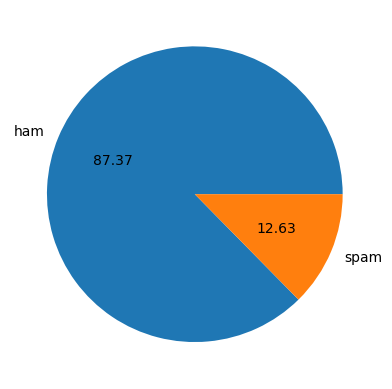

In [400]:
import matplotlib.pyplot as plt

# Create a pie chart of the target column
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")

# Show the pie chart
plt.show()


In [401]:
import nltk


In [402]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/chitralpatil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [403]:
# Define a lambda function to count the number of characters in a text
def count_characters(x): return len(x)


# Apply the lambda function to the text column and store the result in a new column called num_characters
df['num_characters'] = df['text'].apply(count_characters)


In [404]:
# Define a lambda function to count the number of words in a text
def count_words(x): return len(nltk.word_tokenize(x))


# Apply the lambda function to the text column and store the result in a new column called num_words
df['num_words'] = df['text'].apply(count_words)


In [405]:
# Define a lambda function to count the number of sentences in a text
def count_sentences(x): return len(nltk.sent_tokenize(x))


# Apply the lambda function to the text column and store the result in a new column called num_sentences
df['num_sentences'] = df['text'].apply(count_sentences)


In [406]:
df.head()


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [407]:
df[['num_characters', 'num_words', 'num_sentences']].describe()


,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


The `compute_stats` function takes in two arguments: a Pandas DataFrame `df` and a target value `target_value`. The function is designed to compute the descriptive statistics for the columns 'num_characters', 'num_words', and 'num_sentences' using the `.describe()` method on the rows in the `df` DataFrame where the target column matches the specified `target_value`.

The function returns the resulting statistics as a Pandas DataFrame `stats_df`. The function's docstring provides information on the function's parameters, what it does, and what it returns.


In [408]:
def compute_stats(df, target_value):
    """
    Computes descriptive statistics for the columns 'num_characters', 'num_words', and 'num_sentences'
    for the specified target value in the given DataFrame.

    Parameters:
    -----------
    df: Pandas DataFrame
        The DataFrame containing the data to analyze.
    target_value: str
        The target value to analyze (e.g., 'ham' or 'spam').

    Returns:
    --------
    stats_df: Pandas DataFrame
        A DataFrame containing the descriptive statistics for the specified target value.
    """
    stats_df = df.loc[df['target'] == target_value, [
        'num_characters', 'num_words', 'num_sentences']].describe()
    return stats_df


In [409]:
ham_stats = compute_stats(df, 0)
ham_stats


,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [410]:
spam_stats = compute_stats(df, 1)
spam_stats


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [411]:
import seaborn as sns


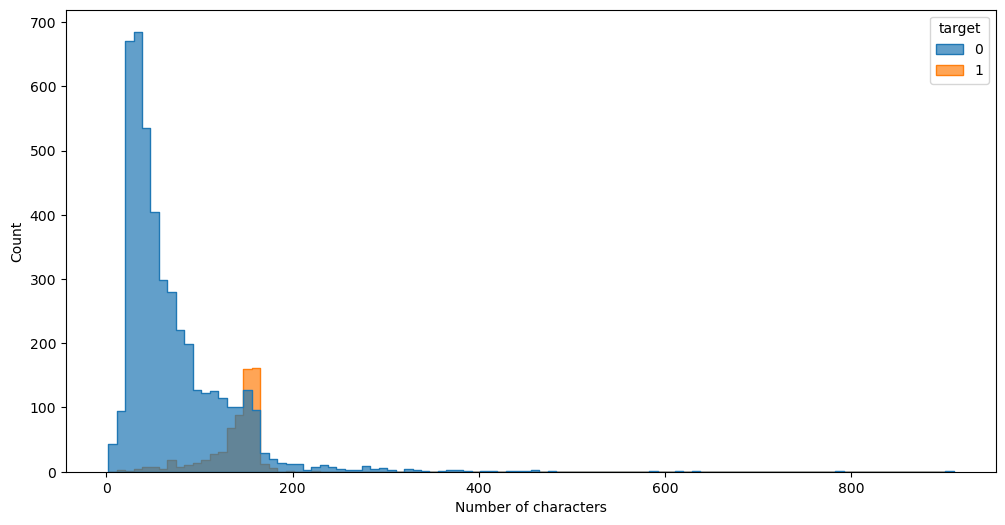

In [412]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='num_characters', hue='target',
             element='step', alpha=0.7, bins=100)

# Add x and y labels to the plot
plt.xlabel('Number of characters')
plt.ylabel('Count')
plt.show()


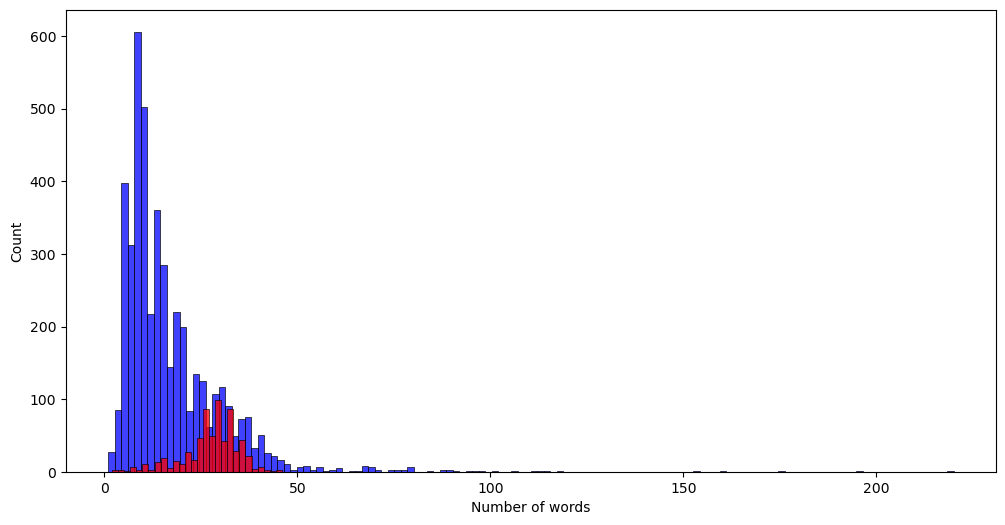

In [413]:
plt.figure(figsize=(12, 6))
for target_value, color in zip([0, 1], ['blue', 'red']):
    sns.histplot(df[df['target'] == target_value]['num_words'], color=color)
    # Add x and y labels to the plot
    plt.xlabel('Number of words')
    plt.ylabel('Count')


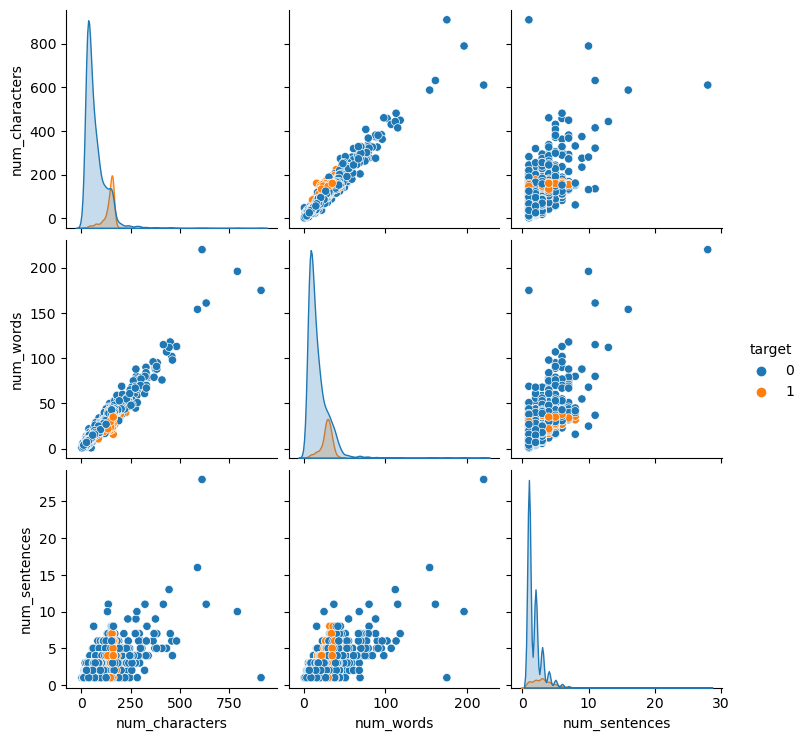

In [414]:
sns.pairplot(df, hue='target')


/var/folders/q4/72ybtynd5sjf5ppl_5vpsw080000gn/T/ipykernel_47952/901736822.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

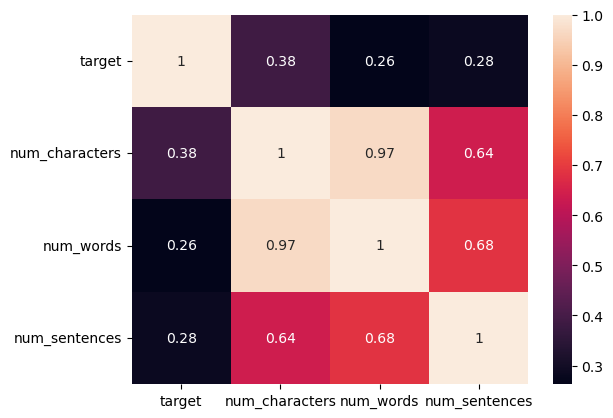

In [415]:
sns.heatmap(df.corr(), annot=True)


## 3. Data Preprocessing


In [416]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chitralpatil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [417]:


def transform_text(text):

    from nltk.stem.porter import PorterStemmer
    import string

    # Convert text to lowercase and tokenize into words
    words = nltk.word_tokenize(text.lower())

    # Remove non-alphanumeric characters
    words = [w for w in words if w.isalnum()]

    # Remove stopwords and punctuation
    stopwords_set = set(nltk.corpus.stopwords.words('english'))
    words = [
        w for w in words if w not in stopwords_set and w not in string.punctuation]

    # Stem words using PorterStemmer
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]

    # Join the preprocessed words into a single string
    return " ".join(words)


In [418]:
transform_text(
    "I'm a data science student at University at Buffalo.")


'data scienc student univers buffalo'

In [419]:
df['transformed_text'] = df['text'].apply(transform_text)


In [420]:
df.head()


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [421]:
def generate_wordcloud_and_barplot(data, target):
    """
    Generates a word cloud and bar plot of the most common words in a given target category of a DataFrame.

    Args:
    data (DataFrame): The DataFrame containing the text data.
    target (int): The target category for which to generate the word cloud and bar plot.

    Returns:
    None
    """
    from collections import Counter
    import matplotlib.pyplot as plt
    import seaborn as sns
    from wordcloud import WordCloud

    print(f"WordCloud for target = {target} \n")
    
    # Generate word cloud
    wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
    corpus = [word for msg in data[data['target'] == target]['transformed_text'].tolist() for word in msg.split()]
    wc.generate(" ".join(corpus))
    plt.figure(figsize=(15, 6))
    plt.imshow(wc)
    plt.show()

    print(f"Bar Plot for target = {target} \n")
    
    # Generate bar plot of most common words
    target_corpus = [word for msg in df[df['target'] == target]
               ['transformed_text'].tolist() for word in msg.split()]
    top_words = Counter(target_corpus).most_common(30)
    sns.barplot(x=[word[0] for word in top_words], y=[word[1] for word in top_words])
    plt.xticks(rotation='vertical')
    plt.show()


WordCloud for target = 1 



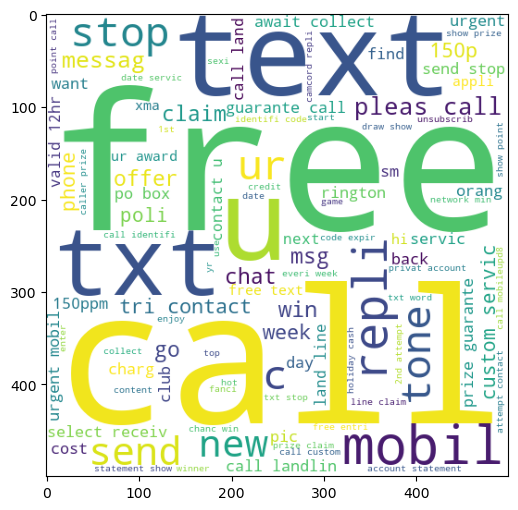

Bar Plot for target = 1 



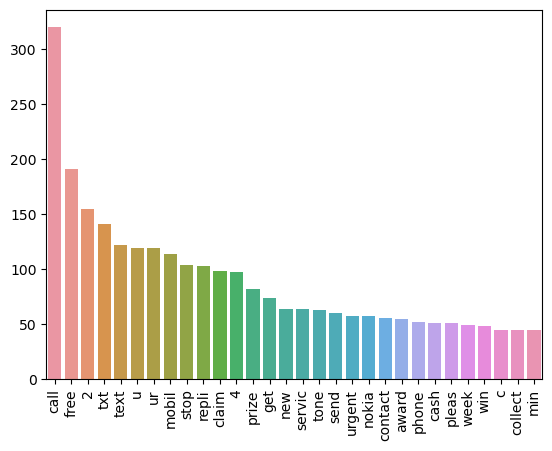

In [422]:
# Generate spam word cloud and bar plot
generate_wordcloud_and_barplot(df, 1)


WordCloud for target = 0 



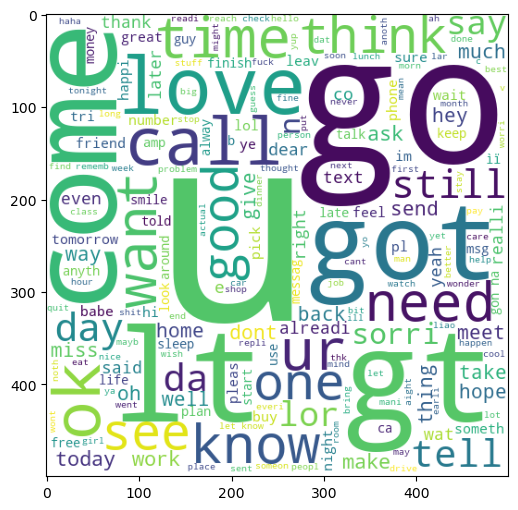

Bar Plot for target = 0 



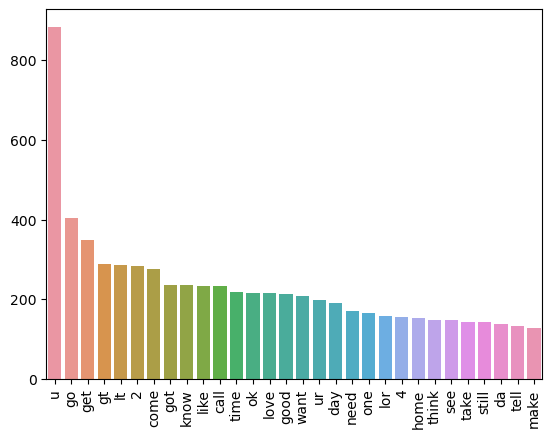

In [423]:
# Generate ham word cloud and bar plot
generate_wordcloud_and_barplot(df, 0)


In [424]:
df.head()


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building

Since the data is imbalanced, we'll pay more heed to the precision score than to the accuracy. 

In [425]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [426]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [427]:
X.shape

(5169, 3000)

In [428]:
y = df['target'].values


In [429]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [430]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [431]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [432]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [433]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [434]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [435]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [436]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [437]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [438]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision


In [439]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [440]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.92
For  xgb
Accuracy -  0.971953578336557
Precision -  0.943089430894309


In [441]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [442]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.971954,0.943089
6,AdaBoost,0.960348,0.929204
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188


In [443]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.974855
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.971954
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.947776
9,BgC,Accuracy,0.957447


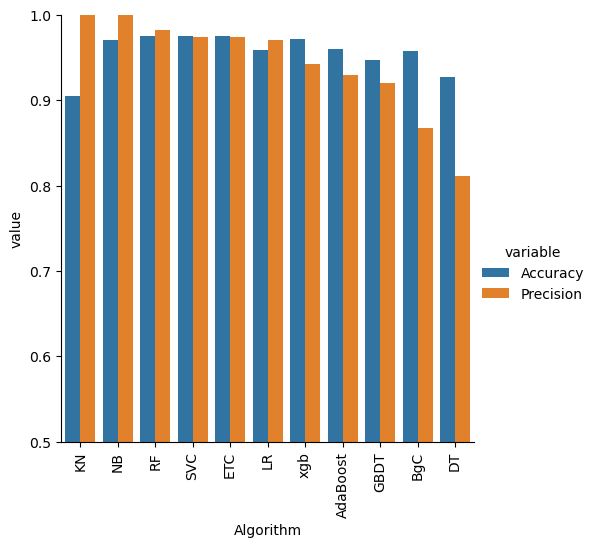

In [444]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [445]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,xgb,0.971954,0.943089,0.971954,0.943089,0.971954,0.943089,0.971954,0.943089
7,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
8,GBDT,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000
9,BgC,0.957447,0.867188,0.957447,0.867188,0.957447,0.867188,0.957447,0.867188


In [446]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [447]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9918032786885246


In [448]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9758220502901354
Precision 0.9185185185185185


tfidf --> MNB seems to be the winner

In [449]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))